In [1]:
import json
import matplotlib.pyplot as plt

# ViT-B/32 pretrained from CLIP

In [2]:
def clip_vit_overview(data, dataset_name=None):
  layers = list(data.keys())
  ranks = [value['rank'] for value in data.values()]
  max_ranks = [min(value["size"]) for value in data.values()]
  color_dict = {
    "Max rank": "gainsboro",
    "Actual rank": "gray"
  }

  plt.scatter(layers, max_ranks, c="gainsboro")
  plt.scatter(layers, ranks, c="gray")
  plt.xlabel('Modules overview')
  plt.xticks([])
  plt.ylabel('Ranks')

  if dataset_name:
    plt.title("ViT-B/32 pretrained from CLIP" + f'\nGradients computed on {dataset_name}')
  else:
    plt.title("ViT-B/32 pretrained from CLIP" + "\nWeights matrices")
  handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=v, markersize=8) for v in color_dict.values()]
  plt.legend(handles, list(color_dict.keys()), loc='upper left', bbox_to_anchor=(1, 1))

  plt.tight_layout()
  plt.show()

In [9]:
def clip_vit_transformers_rank(data, dataset_name):
  layers = []
  ranks = []
  colors = []
  color_dict = {
    "attn_in_proj": "lightcoral", 
    "attn_out_proj": "firebrick", 
    "mlp_layer1": "lightsteelblue", 
    "mlp_layer2": "cornflowerblue"
  }

  for key, value in data.items():
    if "transformer.resblocks" in key:
      transformer_id = key.split(".")[3]
      layers.append(f"T{transformer_id}")
      ranks.append(value["rank"])

      if "attn.in_proj" in key:
        colors.append("lightcoral")
      elif "attn.out_proj" in key:
        colors.append("firebrick")
      elif "mlp.c_fc" in key:
        colors.append("lightsteelblue")
      elif "mlp.c_proj" in key:
        colors.append("cornflowerblue")

  plt.scatter(layers, ranks, c=colors)
  plt.axhline(y=768, color="gray", linestyle='--')
  plt.xlabel('Transformer Blocks')
  plt.ylabel('Ranks\n(gradient matrices)')
  plt.ylim(bottom=0, top=800)
  plt.title("ViT-B/32 pretrained from CLIP" + f'\nGradients computed on {dataset_name}')

  handles = [plt.Line2D([0], [0], color='gray', linestyle='--', markersize=8)]
  handles.extend([plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=v, markersize=8) for v in color_dict.values()])
  plt.legend(handles, ['Max Rank = 768'] + list(color_dict.keys()), loc='upper left', bbox_to_anchor=(1, 1))

  plt.tight_layout()
  plt.show()

### Weights matrices

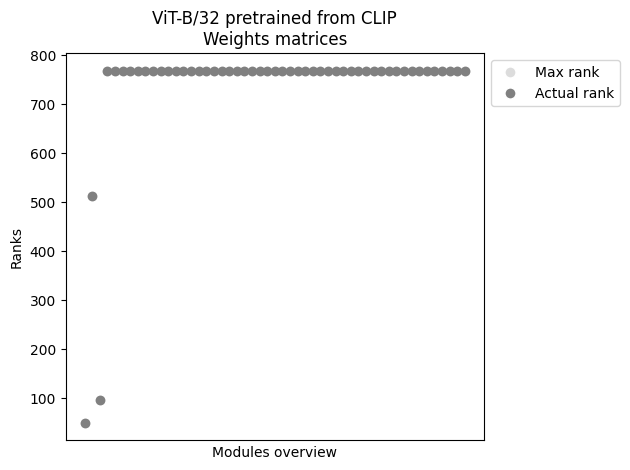

In [65]:
with open('vitB32_weights_rank_clip.json','r') as fp:
  data = json.load(fp)
clip_vit_overview(data)

### Grad on CIFAR10

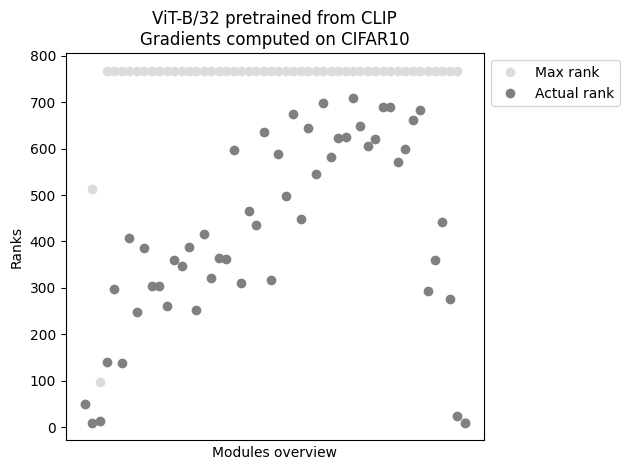

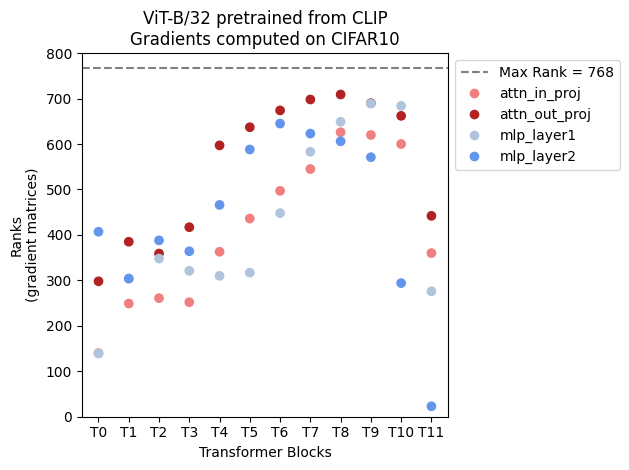

In [10]:
dataset_name = "CIFAR10"
with open('vitB32_grad_rank_clip_cifar10.json','r') as fp:
  data = json.load(fp)
clip_vit_overview(data, dataset_name)
clip_vit_transformers_rank(data, dataset_name)

### Grad on CIFAR100 

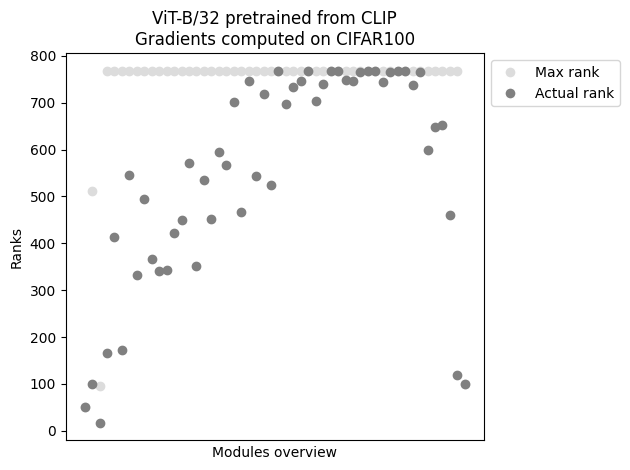

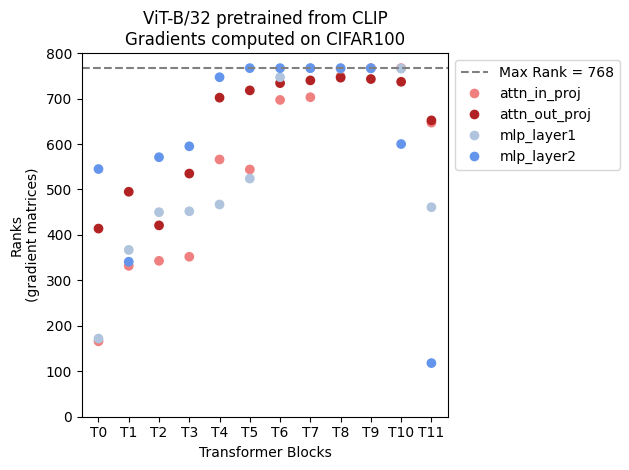

In [11]:
dataset_name = "CIFAR100"
with open('vitB32_grad_rank_clip_cifar100.json','r') as fp:
  data = json.load(fp)
clip_vit_overview(data, dataset_name)
clip_vit_transformers_rank(data, dataset_name)

### Grad on Tiny-ImageNet

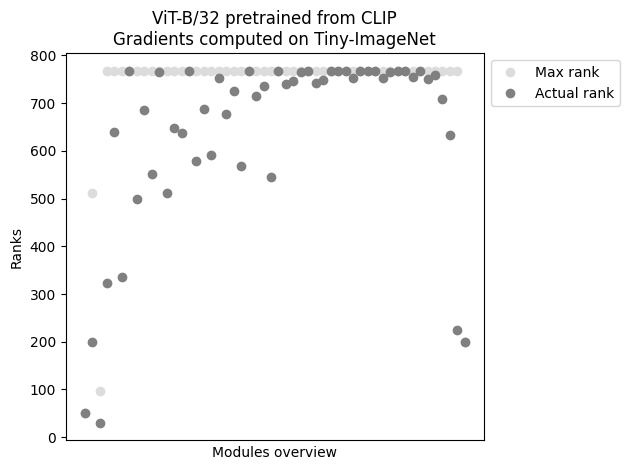

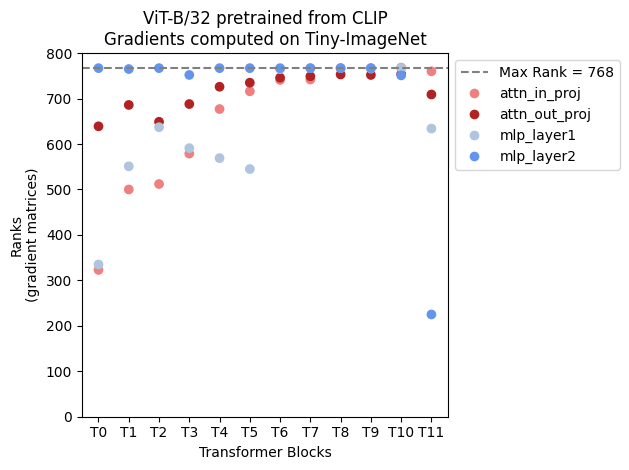

In [12]:
dataset_name = "Tiny-ImageNet"
with open('vitB32_grad_rank_clip_tiny.json','r') as fp:
  data = json.load(fp)
clip_vit_overview(data, dataset_name)
clip_vit_transformers_rank(data, dataset_name)